In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


In [2]:
def h(X):
    return (X**5) / (1 + (X - 3) ** 2) * (X >= 0)


def g_cauchy(x):
    return 1 / (np.pi * (1 + x**2))


def importance_sampling_cauchy(samples, v):
    f_samples = stats.t.pdf(samples, df=v)
    g_samples = g_cauchy(samples)
    weights = f_samples / g_samples
    h_values = h(samples)

    estimate = np.mean(weights * h_values)

    return estimate

def g_normal(x, v):
    return stats.norm.pdf(x, loc=0, scale=np.sqrt(v / (v - 2)))


def importance_sampling_normal(samples, v):
    f_samples = stats.t.pdf(samples, df=v)
    g_samples = g_normal(samples, v)

    weights = f_samples / g_samples
    h_values = h(samples)
    return np.mean(weights * h_values)

def g_exponential(x):
    return np.exp(-x) * (x >= 0)


def importance_sampling_exponential(samples):
    f_samples = stats.t.pdf(samples, df=12)

    g_samples = g_exponential(samples)

    weights = f_samples / g_samples
    h_values = h(samples)

    estimate = np.mean(weights * h_values)

    return estimate

In [3]:
normal_samples = []
cauchy_samples = []
exp_samples = []
mc_samples = []

for i in range(1000):
    samples_cauchy = np.random.standard_cauchy(size=1000)
    cauchy_samples.append(importance_sampling_cauchy(samples_cauchy, 12))

    samples_exponential = np.random.exponential(1, size=1000)
    exp_samples.append(importance_sampling_exponential(samples_exponential))

    samples = stats.t.rvs(df=12, size=1000)
    mc_samples.append(np.mean(h(samples)))

    samples_normal = np.random.normal(0, np.sqrt(12 / (12 - 2)), size=100)

    normal_samples.append(importance_sampling_normal(samples_normal, 12))


normal_data = np.array(normal_samples)
cauchy_data = np.array(cauchy_samples)
mc_data= np.array(mc_samples)
exp_data = np.array(exp_samples)


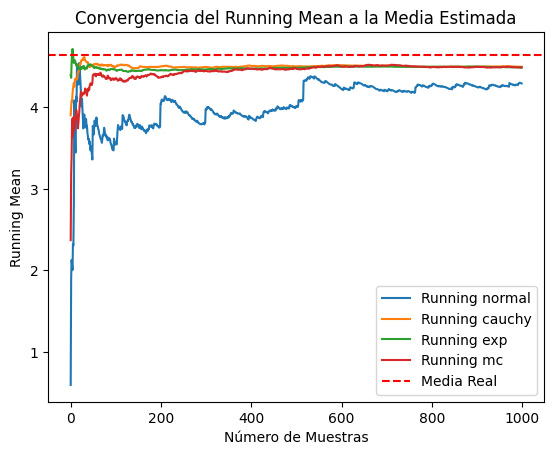

In [4]:
# Estimar E[X^2] y construir la gráfica de la convergencia de los "running means"
running_normal = np.cumsum(normal_data) / np.arange(1, 1000 + 1)
running_cauchy = np.cumsum(cauchy_data) / np.arange(1, 1000 + 1)
running_exp = np.cumsum(exp_data) / np.arange(1, 1000 + 1)
running_mc = np.cumsum(mc_data) / np.arange(1, 1000 + 1)

# Graficar la convergencia
plt.plot(running_normal, label="Running normal")
plt.plot(running_cauchy, label="Running cauchy")
plt.plot(running_exp, label="Running exp")
plt.plot(running_mc, label="Running mc")

plt.axhline(y=4.64, color="r", linestyle="--", label="Media Real")
plt.xlabel("Número de Muestras")
plt.ylabel("Running Mean")
plt.legend()
plt.title("Convergencia del Running Mean a la Media Estimada")
plt.show()

In [5]:
# Función de densidad de la distribución objetivo (Gamma(3/2, 1))
def f(x):
    return (2 / np.sqrt(np.pi)) * np.sqrt(x) * np.exp(-x)


# Función de densidad de la distribución candidata (Gamma(1, 2))
def g(x):
    return x * np.exp(-x)


# Algoritmo de aceptación y rechazo
def accept_reject(n, seed=787):
    # Semilla para la generación de números aleatorios
    rng = np.random.default_rng(seed=seed)
    samples = []
    M = 2 / np.sqrt(np.pi)

    while len(samples) < n:
        # Paso 1: Generar una muestra de la distribución candidata (Gamma(1, 2))
        Y = rng.gamma(1, 2)

        # Paso 2: Generar una variable aleatoria uniforme U
        U = rng.uniform(0, 1)

        # Paso 3: Aceptar o rechazar
        if U <= f(Y) / (M * g(Y)):
            samples.append(Y)

    return np.array(samples)

n_samples = 10000
samples = accept_reject(n_samples)

In [6]:
# Estimación de E[X^2]
E_X2_estimated = np.mean(samples) + np.mean(samples) ** 2
print("Estimación de E[X^2]:", E_X2_estimated)

Estimación de E[X^2]: 3.6972841149920628


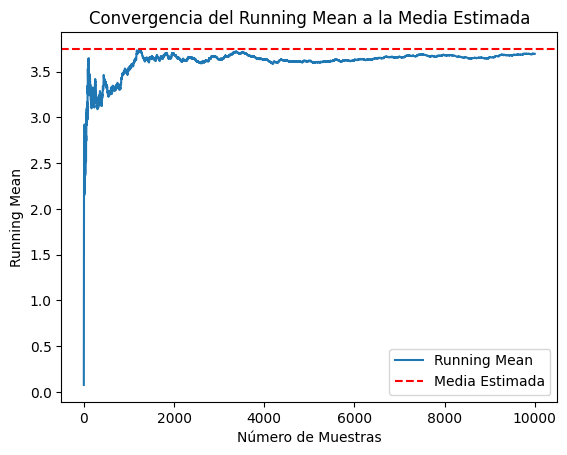

In [7]:
# Estimar E[X^2] y construir la gráfica de la convergencia de los "running means"
running_means = np.cumsum(samples) / np.arange(1, n_samples + 1) + (np.cumsum(samples) / np.arange(1, n_samples + 1))**2

# Graficar la convergencia
plt.plot(running_means, label="Running Mean")
plt.axhline(y=3.75, color="r", linestyle="--", label="Media Estimada")
plt.xlabel("Número de Muestras")
plt.ylabel("Running Mean")
plt.legend()
plt.title("Convergencia del Running Mean a la Media Estimada")
plt.show()

In [16]:
import numpy as np

def f(x):
    return (2 / np.sqrt(np.pi)) * np.sqrt(x) * np.exp(-x)

def g(x):
    return 0.5 * (1 + x) * np.exp(-x)

def accept_reject(n, seed=787):
    rng = np.random.default_rng(seed)
    samples = []
    M = 2 / np.sqrt(np.pi)

    while len(samples) < n:
        # Step 1: Sample from the mixture of Gamma(1,1) and Gamma(2,1)
        coin = rng.integers(0, 2)  # 0 or 1 with equal probability
        if coin == 0:
            Y = rng.gamma(shape=1, scale=1)
        else:
            Y = rng.gamma(shape=2, scale=1)

        # Step 2: Uniform sample
        U = rng.uniform()

        # Step 3: Accept or reject
        if U <= f(Y) / (M * g(Y)):
            samples.append(Y)

    return np.array(samples)


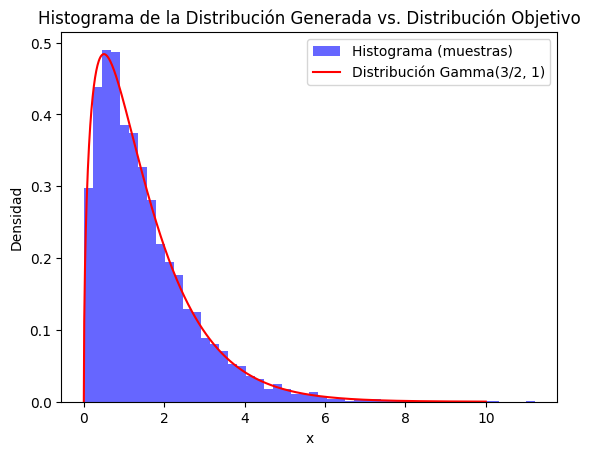

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma


def main(n: int):
    samples = accept_reject(n)

    # Traficar el histograma
    x = np.linspace(0, 10, 1000)
    plt.hist(
        samples,
        bins=50,
        density=True,
        alpha=0.6,
        color="b",
        label="Histograma (muestras)",
    )
    plt.plot(x, gamma.pdf(x, 3/2, scale=1), 'r-', label='Distribución Gamma(3/2, 1)')

    plt.xlabel("x")
    plt.ylabel("Densidad")
    plt.legend()
    plt.title("Histograma de la Distribución Generada vs. Distribución Objetivo")
    plt.show()


if __name__ == "__main__":
    n_samples = 10000
    main(n_samples)
